<a href="https://colab.research.google.com/github/hyeonji826/AI/blob/main/AI%20Agent/4_LangGraph%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EA%B0%84%EB%8B%A8_%EC%B1%97%EB%B4%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Tool Calling Agent
[Tool Calling Agent](https://python.langchain.com/docs/integrations/tools/)는 자신이 가진 지식만 사용하는 것이 아니라, 외부 도구(API, 데이터베이스, 코드 실행기 등)를 호출해 문제를 해결하는 에이전트입니다. 사용자의 질문을 이해한 뒤 필요한 경우 적절한 툴을 선택하고, 입력값을 구성해 호출하며, 반환된 결과를 다시 가공해 최종 답변을 만듭니다. 쉽게 말해, 단순히 대화만 하는 AI가 아니라 “필요할 때 계산기, 검색엔진, 데이터 조회 도구 같은 도구를 직접 쓸 수 있는 AI”가 Tool Calling Agent입니다.

<img src="https://blog.kakaocdn.net/dna/bpNdR2/btsQsJsQfs0/AAAAAAAAAAAAAAAAAAAAANRBb48fj-_u3r63lFyG30rgOBjXxjUAxaNqRYIZi3I9/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=D6gQCjVI9%2FO%2Bphms7G2rxxuMS6g%3D">

## 2. 웹 검색을 하는 챗봇

### 1. Tavily
[Tavily](https://www.tavily.com/)는 웹을 실시간으로 검색해 AI가 최신·정확한 정보를 답변할 수 있도록 돕는 AI용 검색·브라우징 API 플랫폼입니다.

<img src="https://blog.kakaocdn.net/dna/bcG6gs/btsQsLqGsc8/AAAAAAAAAAAAAAAAAAAAAN4N21J1DDr6nFhRcwjzTgjrx13VEOiWBjhU4H-YhM1g/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=lNxGOyEWvCKp68kQeYlL9gMzgU8%3D">

In [1]:
!pip install -U tavily-python

In [11]:
import getpass
import os
from tavily import TavilyClient
from langchain_tavily import TavilySearch

In [3]:
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

OPENAI_API_KEY: ··········
TAVILY_API_KEY: ··········


In [5]:
tavily_client = TavilyClient()

In [6]:
response = tavily_client.search("What is AI Agent?", max_results=3) # , topic="news", days = 10
response

# max_results=3  → 검색 결과의 최대 개수를 지정합니다. 3이므로, 검색 결과를 최대 3개까지 가져옵니다.
# topic="news" → 뉴스 기사 위주로 검색
# days=10 → 최근 10일 이내의 자료만 검색

{'query': 'What is AI Agent?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://aws.amazon.com/what-is/ai-agents/',
   'title': 'What are AI Agents? - Artificial Intelligence - AWS',
   'content': "# What are AI Agents? What are AI Agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. Humans set goals, but an AI agent independently chooses the best actions it needs to perform to achieve those goals. AI agents interact with their environment by collecting data through sensors or digital inputs. The AI agent applies the data to make an informed decision. AI agents can improve your business operations and your customers' experiences. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task 

In [7]:
response['results']

[{'url': 'https://aws.amazon.com/what-is/ai-agents/',
  'title': 'What are AI Agents? - Artificial Intelligence - AWS',
  'content': "# What are AI Agents? What are AI Agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. Humans set goals, but an AI agent independently chooses the best actions it needs to perform to achieve those goals. AI agents interact with their environment by collecting data through sensors or digital inputs. The AI agent applies the data to make an informed decision. AI agents can improve your business operations and your customers' experiences. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task at hand.",
  'score': 0.94989765,
  'raw_content': None},
 {'url': 'https://github.com/resources/articles/a

In [8]:
# get_search_context: 보통 문자열(string) 형태이며, 여러 개의 검색 결과에서 중요한 내용만 추려서 한 덩어리의 텍스트로 제공합니다.
context = tavily_client.get_search_context(query="What is AI Agent?")
context

'[{"url": "https://aws.amazon.com/what-is/ai-agents/", "content": "# What are AI Agents? What are AI Agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. Humans set goals, but an AI agent independently chooses the best actions it needs to perform to achieve those goals. AI agents interact with their environment by collecting data through sensors or digital inputs. The AI agent applies the data to make an informed decision. AI agents can improve your business operations and your customers\' experiences. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task at hand."}, {"url": "https://github.com/resources/articles/ai/what-are-ai-agents", "content": "Feb 6, 2025\\u00b7AI agents are autonomous software tools that perform tasks, 

In [9]:
# qna_search: Tavily가 반환한 최종 답변. 보통 문자열(string) 형태이며, 한두 문장 정도로 정리된 응답을 제공합니다.
answer = tavily_client.qna_search(query="What is AI Agent?")
answer

'An AI agent is an autonomous software program that performs tasks and makes decisions based on data. It can automate complex workflows and interact with its environment. AI agents use machine learning to improve over time.'

### 2. TavilySearch

https://python.langchain.com/docs/integrations/tools/tavily_search/

```
파라미터

max_results (optional, int): 검색 결과 반환 수
topic (optional, str): 검색 카테고리 / "general"(Default), "news", "finance"
include_answer (optional, bool): 쿼리에 대한 답변 포함 여부
include_raw_content (optional, bool): 결과 HTML 포함 여부
include_images (optional, bool): 쿼리 관련 이미지 목록 포함 여부
include_image_descriptions (optional, bool): 각 이미지에 대한 설명 텍스트 포함 여부
search_depth (optional, str): 검색 깊이 / "basic"(Default),"advanced"
time_range (optional, str): 필터링 날짜 범위 - "day", "week", "month", "year"
include_domains (optional, List[str]): 구체적으로 포함할 도메인 목록
exclude_domains (optional, List[str]): 구체적으로 제외할 도메인 목록

```

In [10]:
!pip install langchain_tavily

In [12]:
tool = TavilySearch(max_results=3)
tool.invoke("What's a 'node' in LangGraph?")

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/langgraph',
   'title': 'What is LangGraph? - IBM',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. **Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-maki

In [13]:
invoke_with_toolcall = tool.invoke({"args": {'query': "What's a 'node' in LangGraph?"}, "type": "tool_call", "id": "foo", "name": "tavily_search"})
invoke_with_toolcall

ToolMessage(content='{"query": "What\'s a \'node\' in LangGraph?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.ibm.com/think/topics/langgraph", "title": "What is LangGraph? - IBM", "content": "LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. **Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced

In [14]:
invoke_with_toolcall.content

'{"query": "What\'s a \'node\' in LangGraph?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.ibm.com/think/topics/langgraph", "title": "What is LangGraph? - IBM", "content": "LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. **Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by 

In [15]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [16]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tool.invoke("What's a 'node' in LangGraph?")

/tmp/ipython-input-1835957720.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=2)


[{'title': 'What is LangGraph?',
  'url': 'https://www.ibm.com/think/topics/langgraph',
  'content': 'Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
  'score': 0.9257218},
 {'title': 'LangGraph Tutorial with Practical Example',
  'url': 'https://www.gettingstarted.ai/langgraph-tutorial-with-example/',
  'content': 'Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task.\n\nA LangGraph node takes the state of the graph as a parameter and returns an updated state after it is executed.\n\nHere\'s an example of a basic node, a Python function:\n\n```\nfr

<img src="https://blog.kakaocdn.net/dna/6baZN/btsQsRRXzfR/AAAAAAAAAAAAAAAAAAAAAMhD5n8e45CuIY3PX4j1h2QZ22M3NoS_v-L3xsoowPds/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=c%2Fj%2FFrK3MrgaLn7NKAmBLvS%2Fnb0%3D">

In [17]:
invoke_with_toolcall = tool.invoke({"args": {'query': "What's a 'node' in LangGraph?"}, "type": "tool_call", "id": "foo", "name": "tavily"})
invoke_with_toolcall

ToolMessage(content='[{"title": "What is LangGraph?", "url": "https://www.ibm.com/think/topics/langgraph", "content": "Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.", "score": 0.9257218}, {"title": "LangGraph Tutorial with Practical Example", "url": "https://www.gettingstarted.ai/langgraph-tutorial-with-example/", "content": "Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task.\\n\\nA LangGraph node takes the state of the graph as a parameter and returns an updated state after it is executed.\\n\\nHere\'s an example of a basic node, a Python functi

In [18]:
# results에 들어 있는 정보
invoke_with_toolcall.content

'[{"title": "What is LangGraph?", "url": "https://www.ibm.com/think/topics/langgraph", "content": "Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.", "score": 0.9257218}, {"title": "LangGraph Tutorial with Practical Example", "url": "https://www.gettingstarted.ai/langgraph-tutorial-with-example/", "content": "Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task.\\n\\nA LangGraph node takes the state of the graph as a parameter and returns an updated state after it is executed.\\n\\nHere\'s an example of a basic node, a Python function:\\n\\n```\\nfrom 

In [19]:
# 모델의 모든 실행결과
invoke_with_toolcall.artifact

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/langgraph',
   'title': 'What is LangGraph?',
   'content': 'Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
   'score': 0.9257218,
   'raw_content': None},
  {'url': 'https://www.gettingstarted.ai/langgraph-tutorial-with-example/',
   'title': 'LangGraph Tutorial with Practical Example',
   'content': 'Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task.\n\nA LangGraph node takes the state 

### 3. 도구 바인딩

In [ ]:
!pip install langchain_core

In [25]:
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI

In [24]:
# 데코레이터
@tool
def add(a: int, b: int) -> int:
    # 툴에 대한 설명이 없으면 에러난다.
    """Adds a and b

    Arg:
        a: first int
        b: second int
    """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiply a and b

    Arg:
        a: first int
        b: second int
    """
    return a * b

tools = [add, multiply]

In [22]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 1.9 MB/s eta 0:00:00


In [31]:
llm = ChatOpenAI(model="gpt-5-nano") # model="gpt-4o"
llm_with_tools = llm.bind_tools(tools)

In [32]:
query = "What is 3 * 12? Also, what is 11 + 49?"

# gpt모델은 tool이 필요없어서 tool을 호출하지않음
llm_with_tools.invoke(query).tool_calls

[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'call_AZPwCyv4OGlwdtyIxJsdB8xu',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 11, 'b': 49},
  'id': 'call_sU88vB5zRqdwyfBba41bprpp',
  'type': 'tool_call'}]

In [33]:
query = "What is 12 % 2?"

llm_with_tools.invoke(query).tool_calls

[]

In [34]:
llm_with_tools = llm.bind_tools(tools,
    tool_choice={"type": "function", "function": {"name": "multiply"}}
)

resp = llm_with_tools.invoke("What is 3 * 12? Use tool.")
print(resp.tool_calls)  # 이제 비어있지 않음

[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_PF9QFtOiW9ybRxsEH0VRGS6P', 'type': 'tool_call'}]


In [35]:
from langchain_openai import ChatOpenAI

tool = TavilySearch(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-5-nano")
llm_with_tools = llm.bind_tools(tools) # TavilySearch(tools) 을 호출할 수 있도록 함

In [36]:
llm_with_tools.invoke("안녕")

AIMessage(content='안녕하세요! 무엇을 도와드릴까요? 정보 검색, 번역, 글쓰기, 문제 풀이, 아이디어 뽑기 등 다양한 도움 드릴 수 있어요. 원하시는 주제나 형식을 알려주시면 바로 도와드리겠습니다. 편하게 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 328, 'prompt_tokens': 1351, 'total_tokens': 1679, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CE3z2UrzPJglQSkk2e42swvBh4MLk', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2f79e286-9043-4355-bebf-bb0b9f350d82-0', usage_metadata={'input_tokens': 1351, 'output_tokens': 328, 'total_tokens': 1679, 'input_token_details': {'audio': 0, 'cache_read': 1152}, 'output_token_details': {'audio': 0, 'reasoning': 256}})

In [37]:
llm_with_tools.invoke("What is Langgraph?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_9LCIkIz4ZIHMJ5v1c7SOh1jQ', 'function': {'arguments': '{"query":"Langgraph what is Langgraph"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 1354, 'total_tokens': 1448, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CE3z9si6uF7IQexE9sRydbEbdYGKK', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a463717e-7db1-449c-ba3e-3387c81b0928-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'Langgraph what is Langgraph'}, 'id': 'call_9LCIkIz4ZIHMJ5v1c7SOh1jQ', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1354, 'output_tokens': 94, 'to

In [38]:
llm_with_tools.invoke("What is Langgraph?").tool_calls

[{'name': 'tavily_search',
  'args': {'query': 'Langgraph'},
  'id': 'call_uOxsU8BqNsufmT3GeDks9QOq',
  'type': 'tool_call'}]

In [40]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 7.7 MB/s eta 0:00:00


In [41]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [42]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]} # 일반적인 질문에 대한 일반 답변 or tool_calls

graph_builder.add_node("chatbot", chatbot)

### 4. ToolNode
ToolNode는 LangGraph에서 도구 호출을 실제로 실행해 주는 노드입니다. LLM이 생성한 AIMessage.tool_calls를 읽어 각 호출의 도구 이름과 인자를 매칭해 실행하고, 결과를 ToolMessage로 반환하여 그래프의 상태(대화 기록)에 추가합니다. 보통 “LLM 노드 → ToolNode → LLM 노드” 형태의 루프에서 사용되며, tools_condition 같은 조건부 엣지와 함께 붙여 LLM이 도구를 요청할 때만 ToolNode가 동작하게 합니다. 요약하면, ToolNode는 LLM의 툴 호출 계획을 실제 코드 실행으로 연결하는 브리지로, 도구 레지스트리(이름→함수/툴)만 넘겨주면 호출·에러 처리·결과 전달까지 표준화된 방식으로 처리해줍니다.

In [43]:
import json
from langchain_core.messages import ToolMessage
from langgraph.prebuilt import ToolNode

class BasicToolNode:
    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools} # ["tavily_search" : TavilySearch()]

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1] # 마지막 message
        else:
            raise ValueError("No message found in input")

        outputs = []
        for tool_call in message.tool_calls: # 메시지에서 호출된 도구를 불러옴
            tool_result = self.tools_by_name[tool_call["name"]].invoke( # Tool 호출 실행
                tool_call["args"]
            )
            outputs.append( # Tool 호출 결과(ToolMessage) 추가
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}

tool_node = BasicToolNode(tools=[tool])
# tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

In [44]:
def route_tools(
    state: State,
):

    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")

    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    {"tools": "tools", END: END},
)

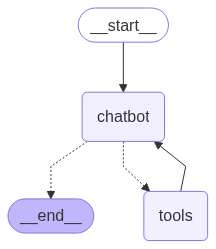

In [45]:
# 엣지 연결
graph_builder.add_edge("tools", "chatbot") # 도구가 호출될 때마다 챗봇으로 돌아가 다음 단계를 결정
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()
graph

In [46]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}): # graph 노드 호출 결과 받아옴
        for value in event.values():
            print("Assistant:", value["messages"][-1].content) # AI 답변 출력

In [47]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: 하이
User: 하이
Assistant: 안녕하세요! 무엇을 도와드릴까요? 필요하신 분야를 말씀해 주시면 바로 도와드리겠습니다. 예시로는

- 질문에 답하기
- 글쓰기 아이디어 제공/수정
- 요약/정리
- 번역
- 간단한 계산이나 정보 검색
- 코딩 도움

중 편하신 걸로 시작해 볼까요?
User: 이력서 좀 써줘
User: 이력서 좀 써줘
Assistant: 좋아요! 이력서를 맞춤형으로 작성해 드리려면 몇 가지 정보를 알려주시면 됩니다. 먼저 기본 템플릿을 드리고, 필요한 내용을 채워 주시면 바로 완성본으로 다듬어 드릴게요. 

다양한 형식 중 선택 가능
- 한국식 이력서 (1장 중심, 간결하게 핵심 성과 위주)
- 다국적 기업용 영어/영문 이력서
- 이력서와 간단한 자기소개서가 함께 필요하면 같이 구성

먼저 채워주시면 좋을 정보
- 지원 직무/업종: 어떤 직무에 지원하나요? 예: 마케팅 매니저, 소프트웨어 엔지니어 등
- 최종 학력: 학교 이름, 학위, 전공, 졸업 연도
- 경력 요약: 최근 직무 한두 줄 요약
- 주요 경력 항목(최근 3개 정도): 회사명, 직책, 재직 기간, 핵심 업무 3–5개와 성과(숫자 포함 가능하면 더 좋습니다)
- 핵심 기술/역량: 프로그래밍 언어, 도구, 소프트웨어, 방법론 등
- 자격증/수상 내역: 자격증 이름, 발급기관, 취득연도
- 언어 능력: 외국어 및 숙련도
- 프로젝트/포트폴리오: 중요 프로젝트 이름, 역할, 사용 기술, 성과
- 기타: 어필하고 싶은 강점이나 수치화된 성과가 있다면
- 원하시는 이력서 길이: 1장/2장
- 포맷 언어: 한국어 버전, 영어 버전, 또는 이중 버전 여부
- 링크/포트폴리오: LinkedIn, GitHub, 홈페이지 등 필요하면 URL

제안하는 기본 템플릿(한국식, 1장)
- 개인 정보: 이름, 연락처, 이메일, 주소(선택), LinkedIn
- 채용 목표 프로필(2–3문장): 지원 직무에 맞춘 핵심 역량과 가치 제시
- 핵심 역량(스킬 요약): 6–8개 핵심 기술
- 경력 

KeyboardInterrupt: 

### 5. create_react_agent
create_react_agent는 LangChain에서 ReAct 패턴(Reason+Act)을 따르는 에이전트를 손쉽게 구성하는 팩토리로, LLM과 사용할 도구 목록, 그리고 적절한 프롬프트를 결합해 “생각→도구 호출→관찰→최종 답변”의 반복 루프를 수행하는 Agent 객체를 만들어줍니다. 이 에이전트는 질문을 해석해 필요한 도구를 선택하고 인자를 구성해 호출한 뒤, 결과를 반영해 다음 행동을 결정하며, 보통 AgentExecutor와 함께 실행하여 다단계 추론과 복수의 툴 호출을 자동으로 오케스트레이션합니다. 핵심은 프롬프트(지침), LLM, 툴 레지스트리(이름→함수/API), 출력 파서를 표준화해 붙여주는 것이며, OpenAI 스타일의 툴콜을 포함한 다양한 LLM과 호환되어 실용적인 “생각하며 도구를 쓰는” 에이전트를 빠르게 구성할 수 있게 해주는 점입니다.

In [48]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

tool = TavilySearch(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-5-nano")
agent = create_react_agent(llm, tools)

In [49]:
response = agent.invoke({"messages": [{"role": "user", "content": "What is LangGraph?"}]})

In [50]:
response

{'messages': [HumanMessage(content='What is LangGraph?', additional_kwargs={}, response_metadata={}, id='9707d3d5-9bd5-4e82-9041-2650e0e284be'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Qtd8VQiSZKsfCx9y6MLbcoxe', 'function': {'arguments': '{"query":"LangGraph"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 154, 'prompt_tokens': 1354, 'total_tokens': 1508, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CE4BNj8iTJAJIcbaImyra0XXXx0cJ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8fe9a1d0-30a3-4532-ab5f-4f951e3bf040-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'LangGraph'}, 'id': 'call_Qt